In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#from google.colab import files
#files.upload()

In [3]:
#!mkdir ~/.kaggle #created at root folder in colab

In [4]:
#copy
#!cp kaggle.json ~/.kaggle
#!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
#!kaggle datasets download -d puneet6060/intel-image-classification

In [6]:
#unzip dataset in colab session
#!unzip -q covid19-radiography-database.zip # -q for quiet 

In [7]:
from keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, UpSampling2D, Flatten, BatchNormalization, Dense, Dropout, GlobalAveragePooling2D
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.models import Sequential
import numpy as np
import glob
import matplotlib.pyplot as plt

In [8]:
IMAGE_SIZE = [150, 150]
# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable =ble = True


# our layers - you can add more if you want
layer1 = Flatten()(resnet.output)
layer2 = Dense(256, activation='relu')(layer1)
layer3 = Dense(128, activation='relu')(layer2)
layer4 = Dense(64, activation='relu')(layer3)
prediction = Dense(3, activation='softmax')(layer4)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
# view the structure of the model
model.summary()
model.compile(
  loss='categorical_crossentropy',
  optimizer= sgd,
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_test_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.20)


training_set = train_test_datagen.flow_from_directory("/content/COVID-19 Radiography Database/",
                                       batch_size = 64,
                                       target_size = (150, 150),
                                       shuffle = True,
                                       subset = "training",
                                       class_mode='categorical')

test_set = train_test_datagen.flow_from_directory("/content/COVID-19 Radiography Database/",
                                   batch_size = 64,
                                   target_size = (150, 150),
                                   shuffle = False,
                                   subset = "validation",
                                   class_mode='categorical')



Found 3109 images belonging to 3 classes.
Found 777 images belonging to 3 classes.


In [10]:
r = model.fit_generator(generator=training_set,
                        validation_data=test_set,
                        epochs = 15,
                        steps_per_epoch = len(training_set),
                        validation_steps = len(test_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
49/49 [==============================] - 66s 1s/step - loss: 1.0925 - accuracy: 0.3976 - val_loss: 1.0210 - val_accuracy: 0.3964
Epoch 2/15
49/49 [==============================] - 59s 1s/step - loss: 0.9465 - accuracy: 0.5048 - val_loss: 0.9253 - val_accuracy: 0.4968
Epoch 3/15
49/49 [==============================] - 59s 1s/step - loss: 0.8601 - accuracy: 0.5758 - val_loss: 0.8082 - val_accuracy: 0.6178
Epoch 4/15
49/49 [==============================] - 58s 1s/step - loss: 0.8035 - accuracy: 0.6248 - val_loss: 0.8097 - val_accuracy: 0.5972
Epoch 5/15
49/49 [==============================] - 59s 1s/step - loss: 0.8228 - accuracy: 0.5948 - val_loss: 0.8649 - val_accuracy: 0.5598
Epoch 6/15
49/49 [==============================] - 58s 1s/step - loss: 0.8127 - accuracy: 0.6041 - val_loss: 0.9931 - val_accuracy: 0.5045
Epoch 7/15
49/49 [==============================] - 59s 1s/step - loss: 0.8283 - accuracy: 0.6135 - val_loss: 0.7595 - val_accuracy: 0.6396
Epoch 8/15
49/49 [==

In [11]:
# save the model's trained weights
#model.save_weights('sequential_model_project_weights_try2.h5')
#!cp "/content/sequential_model_project_weights_try2.h5" "/content/drive/MyDrive/"

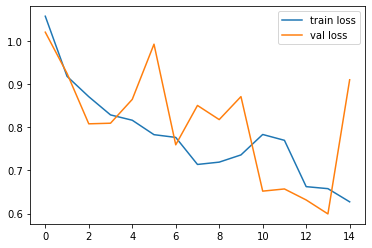

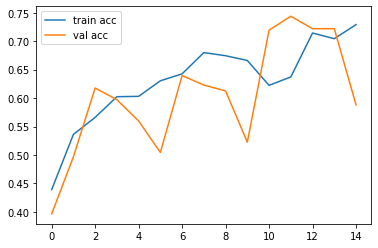

<Figure size 432x288 with 0 Axes>

In [12]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [13]:
pred_original_labels = test_set.classes

pred_label = model.predict_generator(test_set)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [14]:
# Plotting the confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(pred_label, axis=1)
class_labels = list(test_set.class_indices.keys()) 
report = metrics.classification_report(pred_original_labels, y_pred, target_names=class_labels)
print(report) 

print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))

                 precision    recall  f1-score   support

          COVID       0.93      0.80      0.86       240
         NORMAL       0.48      1.00      0.64       268
Viral Pneumonia       1.00      0.02      0.04       269

       accuracy                           0.60       777
      macro avg       0.80      0.61      0.52       777
   weighted avg       0.80      0.60      0.50       777

Confusion Matrix
[[192  48   0]
 [  0 268   0]
 [ 15 248   6]]
